# Shipt – Interview Exercise Python Analyst 

In [864]:
#importing all libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [865]:
#importing all files

df= pd.read_csv("InterviewData_Activity.csv") 
cost= pd.read_csv("InterviewData_Cost.csv") 
parsing= pd.read_csv("InterviewData_Parsing.csv") 
rev= pd.read_csv("InterviewData_Rev.csv") 

# (Q1) Join Revenue and Cost based on Source_id and date, returning all rows from both regardless of whether there is a match between the two data sets

In [866]:
#let us see how the data for InterviewData_Rev looks like
rev.head()

,date,source_id,revenue
0,8/1/14,PA0368,5717.0
1,1/31/14,PA0277,1380.0
2,6/9/14,PA0745,7535.0
3,9/1/14,PA0751,2868.0
4,3/12/14,PA0859,10757.0


In [867]:
#let us see how the data for InterviewData_Cost looks like
cost.head()

,date,source_id,cost
0,10/17/14,PA0577,7168.0
1,8/17/14,PA0354,7615.0
2,1/7/14,PA0607,4054.0
3,8/25/14,PA0745,9317.0
4,11/30/14,PA0923,5586.0


Here, I merged the cost and rev dataframes on the condition that they match on the date and source_id, 
how="outer" indicates it is an outer join, i.e., all rows from both the data frames are joined even of they aren't present in the other dataframe

In [868]:
merge_cv=pd.merge(rev,cost,on=['date','source_id'],how='outer',indicator=True)
merge_cv.head(10)

,date,source_id,revenue,cost,_merge
0,8/1/14,PA0368,5717.0,NaN,left_only
1,1/31/14,PA0277,1380.0,NaN,left_only
2,6/9/14,PA0745,7535.0,588.0,both
3,9/1/14,PA0751,2868.0,3736.0,both
4,3/12/14,PA0859,10757.0,1391.0,both
5,8/10/14,PA0470,9988.0,9627.0,both
6,9/4/14,PA0482,9389.0,5123.0,both
7,12/6/14,PA0482,2744.0,NaN,left_only
8,6/2/14,PA0830,859.0,1820.0,both
9,2/11/14,PA0958,4132.0,5147.0,both


# (Q2) join these two data sets by “date” and “source_id”, returning only the rows from the “Cost” file that have no corresponding date in the “Revenue” file

The problem is a little ambiguous, if I join cost and revenue on source_id and date, it automatically filters out those dates from revenue, which are present in cost as well, but their source_id's are different.

I am assuming the problem meant create a dataset by joining cost and revenue on source_id, date
then, from this new dataset, return only the rows from the "Cost" file with no corresponding date in the "Revenue" file.

In [869]:
#here, I created a right join on cost, the indicator shows whether the source_id, dates were common between the datasets, or only in cost

merge_cv2=pd.merge(rev,cost,on=['date','source_id'],how='right',indicator=True)
merge_cv2.tail(5)

,date,source_id,revenue,cost,_merge
9995,12/7/14,PA0900,NaN,2037.0,right_only
9996,7/11/14,PA0474,NaN,726.0,right_only
9997,1/10/14,PA0830,NaN,6202.0,right_only
9998,1/31/14,PA0467,NaN,7057.0,right_only
9999,10/1/14,PA0293,NaN,1053.0,right_only


now, I'll filter out the rows from the new dataset such that the date was present in only cost and not revenue, then I'll drop unnecessary columns

In [870]:
cost_only =merge_cv2[merge_cv2['_merge'] == 'right_only']
cost_only = cost_only.drop(cost_only .columns[[2,4]], axis=1) 
cost_only.head()

,date,source_id,cost
5382,11/30/14,PA0923,5586.0
5383,12/17/14,PA0952,6662.0
5384,5/22/14,PA0411,4795.0
5385,10/14/14,PA0168,9651.0
5386,2/13/14,PA0354,2752.0


# (Q 3A) Using your result from #1, what are the Top 4 sources (“source_id” values) in terms of total revenue generation across this data set?

In [490]:
dataframe_agg = merge_cv.groupby(['source_id']).agg({'revenue':sum}).sort_values('revenue', ascending=False).reset_index().head(4)

In the above code, I calculated the total sum of revenue for each source_id for the entire year, sorted them by the revenue, and using head(4), extracted the top 4 source_id

In [829]:
print("The top four source_id's and their corresponding revenues are:")
dataframe_agg

The top four source_id's and their corresponding revenues are:


,source_id,revenue
0,PA0527,1385747.0
1,PA0308,1338615.0
2,PA0352,1309685.0
3,PA0552,1283190.0


# (Q 3B) How would you visualize the monthly revenue for those Top 4 sources?

I would use a line chart to visualize the monthly revenue from the top 4 sources. Since month (time) is a continuous variable, it won't make sense to use a bar graph. Instead, a line chart will allow us to compare the revenue at any point of time for ay source id. Although not needed, but I'll create a line chart to showcase my analysis visually. 

Here, I converted the date column to datatype DateTime, so I could extract the month and aggregate the monthly revenue for the top 4 source_ids

In [871]:
top_source_id=dataframe_agg.source_id.to_list()
dataframe_1= merge_cv[merge_cv.source_id.isin(top_source_id)]
dataframe_1['date'] = pd.to_datetime(dataframe_1['date'])
dataframe_1['month'] = pd.DatetimeIndex(dataframe_1['date']).month

dataframe_1 =dataframe_1.groupby(['source_id','month']).agg({'revenue':sum}).sort_values('revenue', ascending=False).reset_index()
g=pd.pivot_table(dataframe_1, columns="source_id",values = 'revenue', index='month').reset_index()

C:\Users\imsid\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\imsid\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


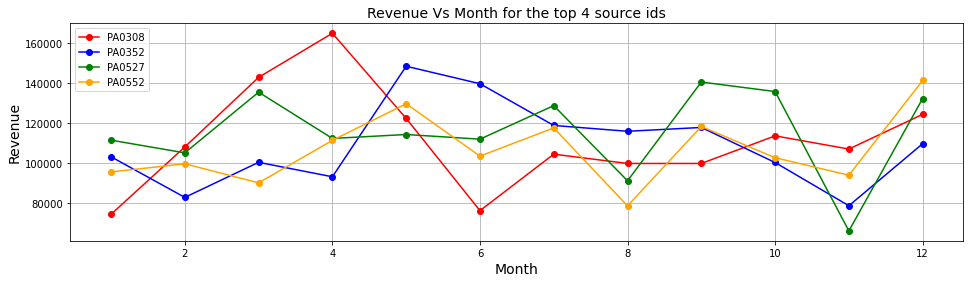

In [872]:
fig= plt.figure(figsize=(16,4))

plt.plot(g['month'], g['PA0308'], color='red', marker='o', label='PA0308')
plt.plot(g['month'], g['PA0352'], color='blue', marker='o',label='PA0352')
plt.plot(g['month'], g['PA0527'], color='green', marker='o', label='PA0527')
plt.plot(g['month'], g['PA0552'], color='orange', marker='o', label='PA0552')
plt.title('Revenue Vs Month for the top 4 source ids', fontsize=14)

plt.xlabel('Month', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.grid(True)

plt.legend(loc="upper left")
plt.show()

# Q4) run the following code to build a basic logistic regression model:


In [873]:
dummy_genders = pd.get_dummies(df['gender'], prefix = 'gender')
dummy_metro = pd.get_dummies(df['metropolitan_area'], prefix = 'metro_area')
dummy_device = pd.get_dummies(df['device_type'], prefix = 'device')
cols_to_keep = ['active', 'age']
activity_data = df[cols_to_keep].join(dummy_genders.loc[:, 'gender_M':])
activity_data = activity_data.join(dummy_metro.loc[:, 'metro_area_Birmingham':])

activity_data = activity_data.join(dummy_device.loc[:, 'device_Mobile':])
activity_data = sm.add_constant(activity_data, prepend=False)
explanatory_cols = activity_data.columns[1:]
full_logit_model = sm.GLM(activity_data['active'], activity_data[explanatory_cols], family=sm.families.Binomial())
result = full_logit_model.fit()

In [874]:
def conf_mat(y, x):
    y_pred = []
    for a in result.predict(x).tolist():
        if a >= 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    print("The confusion Matrix is:")
    print(metrics.confusion_matrix(y,y_pred))
    cm = metrics.confusion_matrix(y,y_pred)
    
    TN = cm[1][1]
    TP = cm[0][0]
    FN = cm[0][1]
    FP = cm[1][0]
    
    print("The accuracy score is:", (TP + TN) / (TP + TP + FN + FP))
    print("The precision score is:", (TN) / (TN + FN))

In [875]:
conf_mat(activity_data['active'], activity_data[explanatory_cols])

The confusion Matrix is:
[[1626 1164]
 [1109 1521]]
The accuracy score is: 0.5695927601809955
The precision score is: 0.5664804469273743


# (Q5) Split the data into training and test samples, and build a model over the training data 

In [876]:
training_data = activity_data[1:4000]
test_data = activity_data[4001:].copy()
training_logit_model = sm.GLM(training_data['active'],
training_data[explanatory_cols],
family=sm.families.Binomial())
training_result = training_logit_model.fit()

In [877]:
conf_mat(test_data['active'],test_data[explanatory_cols])

The confusion Matrix is:
[[787 503]
 [ 53  76]]
The accuracy score is: 0.4051643192488263
The precision score is: 0.13126079447322972


In [878]:
print("The Accuray of the model falls by:",round(100*(0.5695927601809955- 0.4051643192488263)/0.5695927601809955,2), "% when it is tested on unseen data")

The Accuray of the model falls by: 28.87 % when it is tested on unseen data


The reason for such a low accuracy is, earlier it was tested on the same data on which it was trained i.e. The model was not generalized.

Generalization means how well our machine learning model can learn the training data concepts and apply them to specific examples not seen by it (test data). In simple words, it suffers from Overfitting. 

Overfitting happens because our model learns the outliers, anomalies, and noise from the training data to such an extent that it incorrectly affects its performance on the test data (unseen data). The low accuracy is because these concepts don't apply to test (new data) and negatively impact the model's ability to generalize.

An excellent way to test Overfitting and improve it is by using k-fold validation.

# (Q6) Parse out the values (stored in the “data_to_parse” column) into four separate columns

I created a copy of the original column - data_to_parse so I can manipulate it and split it without affecting the original column

In [879]:
parsing["data_to_parse_copy"]=parsing["data_to_parse"]

In [880]:
# replaced the unnecessary values by replacing them with blank spaces, then I split the column to remove useless data. then drooped the duplicate column

parsing['data_to_parse_copy'] = parsing['data_to_parse_copy'].str.replace('}','').str.replace(']','').str.replace('"','').str.replace('value','').str.replace(':','')
parsing[['One','Two','Three','Four']] = parsing.data_to_parse_copy.str.split(";",expand=True) 
parsing = parsing.drop('data_to_parse_copy', axis=1)

In [881]:
parsing.head()

,userid,data_to_parse,One,Two,Three,Four
0,54f3ad9a29ada,"""value"":""N;U;A7;W""}]",N,U,A7,W
1,54f69f2de6aec,"""value"":""N;U;I6;W""}]",N,U,I6,W
2,54f650f004474,"""value"":""Y;U;A7;W""}]",Y,U,A7,W
3,54f52e8872227,"""value"":""N;U;I1;W""}]",N,U,I1,W
4,54f64d3075b72,"""value"":""Y;U;A7;W""}]",Y,U,A7,W
